In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, Flatten, Dropout, MaxPooling1D
from keras.layers import Embedding
from keras.preprocessing import sequence
np.random.seed(7)

Using TensorFlow backend.


In [2]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

#Padding the sequences to the same length
max_length = 500
X_train = sequence.pad_sequences(X_train, maxlen = max_length)
X_test = sequence.pad_sequences(X_test, maxlen = max_length)

#Word Embedding
embedding_vector_length=32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=max_length))

#CNN Model
model.add(Conv1D(32, kernel_size= 3, padding= 'same', input_shape=(max_length, embedding_vector_length)))
model.add(Conv1D(32, kernel_size= 3, padding= 'same'))
model.add(Conv1D(32, kernel_size= 3, padding= 'same'))
model.add(Conv1D(32, kernel_size= 3, padding= 'same'))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=3, batch_size=32)

#Evaluation on the Test Set
score, acc = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/3
25000/25000 [==============================] - 101s - loss: 0.3829 - acc: 0.8176   
Epoch 2/3
25000/25000 [==============================] - 100s - loss: 0.2427 - acc: 0.9042   
Epoch 3/3
25000/25000 [==============================] - 107s - loss: 0.1590 - acc: 0.9428   


In [3]:
print("Accuracy: %.2f%%" % (acc*100))
print("Test score: %.2f%%" % (score*100))

# Confusion Matrix

from sklearn.metrics import classification_report,confusion_matrix
##
y_pred = model.predict_classes(np.array(X_test))

from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))


target_names = ['pos', 'neg']
cnf_matrix_test = confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names=target_names))
print(cnf_matrix_test)

Accuracy: 84.67%
Test score: 39.92%
24960/25000 [============================>.] - ETA: 0s0.84668
             precision    recall  f1-score   support

        pos       0.85      0.85      0.85     12500
        neg       0.85      0.85      0.85     12500

avg / total       0.85      0.85      0.85     25000

[[10601  1899]
 [ 1934 10566]]


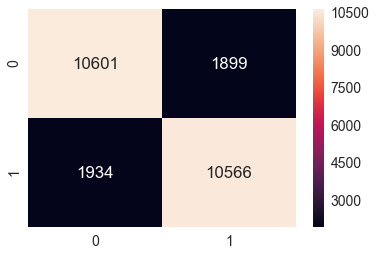

In [4]:
df_cm = pd.DataFrame(cnf_matrix_test, range(2), range(2))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='d')

In [5]:
TP = cnf_matrix_test[1, 1]
TN = cnf_matrix_test[0, 0]
FP = cnf_matrix_test[0, 1]
FN = cnf_matrix_test[1, 0]

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print(classification_error)

0.15332
